Use Rel_RK4_dipol to see how relativistic protons move in an ideal dipole field of the Earth. Use protons with 10 MeV (250 MeV), Init. values: x_0 = 2.5Rz (4Rz), y_0 = z_0 = 0, V_x = 0, V_y = 0.145*0.5c (0.616*0.5c), V_z = 0.145*0.866c (0.616*0.866c). Modify T_sim, dt, T_smp, d

### For 10MeV energy

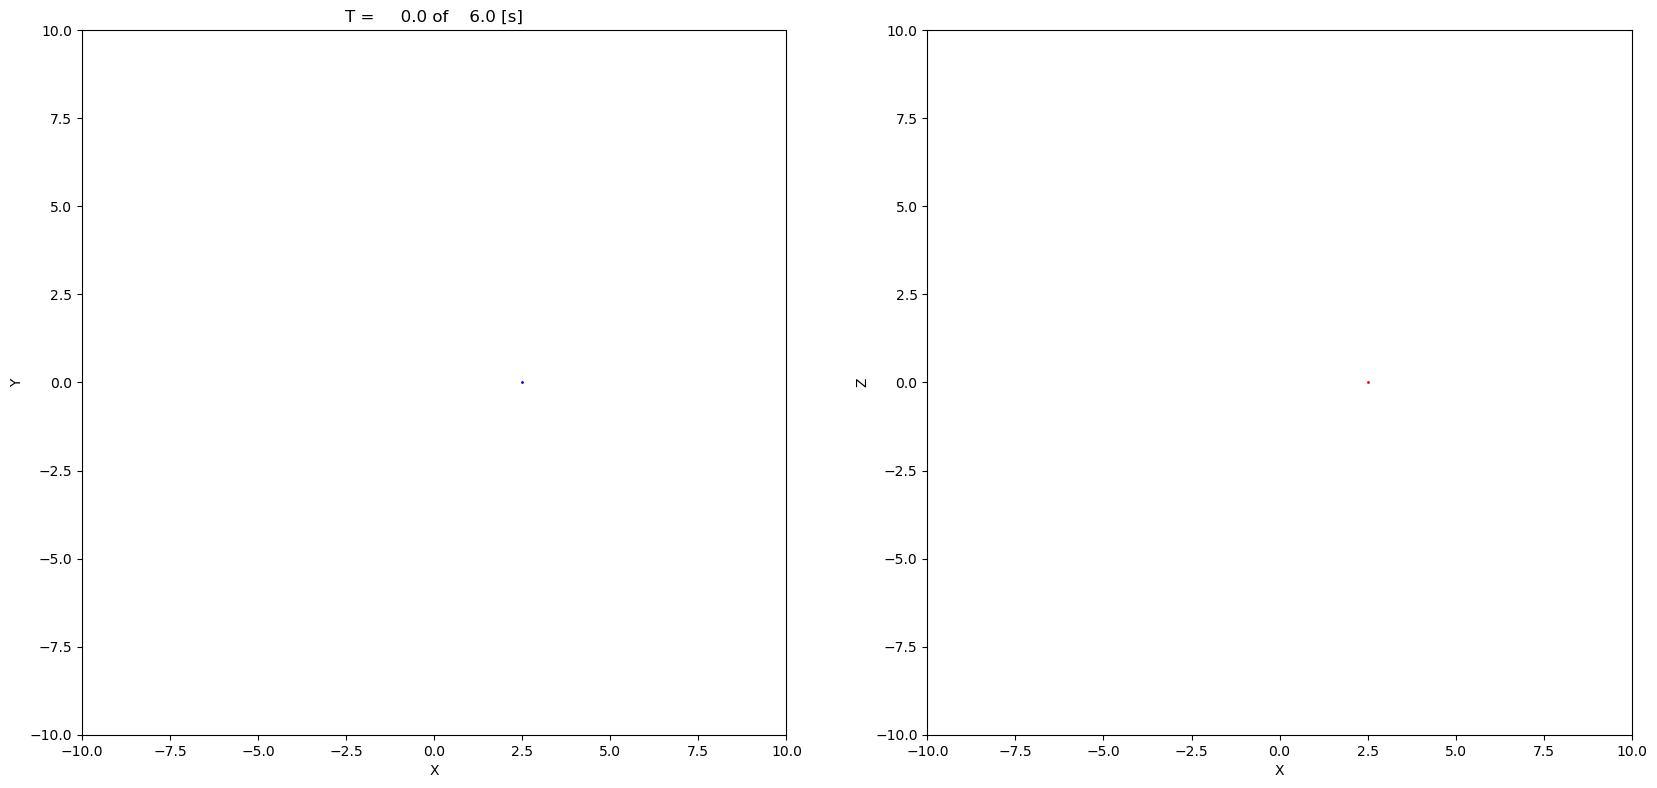

[0.00105207]


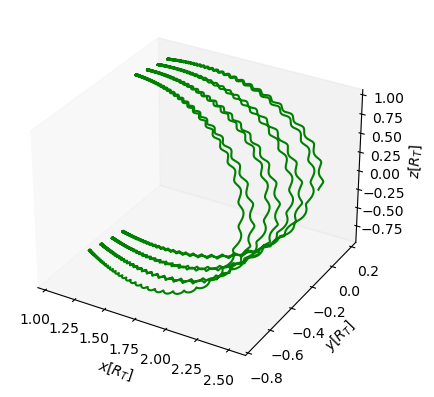

In [1]:
# Relativistic, RK4


import numpy as np
import matplotlib.pyplot as plt
import PVREDNOSTI, IZLAZ, DEFPOLJA 
from mpl_toolkits.mplot3d import Axes3D

#############################
# Input
#############################

N = 1 # only one particle is considered

T_sim = 6 # simulation duration[s] 
dt = 0.0001 # timestep 
T_smp = 0.001 # timestep for graphycal representation

##########################
# Def
##########################

l = 0
q = np.zeros(N)
m = np.zeros(N)
x = np.zeros(N)
y = np.zeros(N)
z = np.zeros(N)
vx = np.zeros(N)
vy = np.zeros(N)
vz = np.zeros(N)
EPx = 0.0
EPy = 0.0
EPz = 0.0
BPx = 0.0
BPy = 0.0
BPz = 0.0   
pomx = np.zeros(N)
pomy = np.zeros(N)
pomz = np.zeros(N)

c = 299792458.0 # [m/s]

#################
# Init
#################

t = 0.0
 
q, m, x, y, z, vx, vy, vz = PVREDNOSTI.puslovi(N, np)

fig, sp1, sp2 = IZLAZ.init_plots(plt)

xx = np.zeros(60001)
yy = np.zeros(60001)
zz = np.zeros(60001)

ii = 0

xx[ii] = x
yy[ii] = y
zz[ii] = z

###############
# Main loop
###############
# RK4, see
# https://www.compadre.org/PICUP/resources/Numerical-Integration/

kinetickainit = m*0.5*(vx**2.0 + vy**2.0 + vz**2.0)

while t < (T_sim - dt):	

    #print(t)

    BPx, BPy, BPz, EPx, EPy, EPz = DEFPOLJA.magdipol(x, y, z, t, np)

    k1x = vx
    k1y = vy
    k1z = vz

    k1vx = (q/m)*np.sqrt(1.0 - ((k1x**2.0 + k1y**2 + k1z**2.0)/(c**2.0)))*(EPx + (k1y*BPz) - (BPy*k1z) - ((((EPx*k1x) + (EPy*k1y) + (EPz*k1z))/(c**2))*k1x))
    k1vy = (q/m)*np.sqrt(1.0 - ((k1x**2.0 + k1y**2 + k1z**2.0)/(c**2.0)))*(EPy + (k1z*BPx) - (BPz*k1x) - ((((EPx*k1x) + (EPy*k1y) + (EPz*k1z))/(c**2))*k1y))
    k1vz = (q/m)*np.sqrt(1.0 - ((k1x**2.0 + k1y**2 + k1z**2.0)/(c**2.0)))*(EPz + (k1x*BPy) - (BPx*k1y) - ((((EPx*k1x) + (EPy*k1y) + (EPz*k1z))/(c**2))*k1z))
    
    BPx, BPy, BPz, EPx, EPy, EPz = DEFPOLJA.magdipol((x + (0.5*k1x*dt)), (y + (0.5*k1y*dt)), (z + (0.5*k1z*dt)), (t + (0.5*dt)), np)

    k2x = vx + (0.5*k1vx*dt)
    k2y = vy + (0.5*k1vy*dt)
    k2z = vz + (0.5*k1vz*dt)

    k2vx = (q/m)*np.sqrt(1.0 - ((k2x**2.0 + k2y**2 + k2z**2.0)/(c**2.0)))*(EPx + (k2y*BPz) - (BPy*k2z) - ((((EPx*k2x) + (EPy*k2y) + (EPz*k2z))/(c**2))*k2x))
    k2vy = (q/m)*np.sqrt(1.0 - ((k2x**2.0 + k2y**2 + k2z**2.0)/(c**2.0)))*(EPy + (k2z*BPx) - (BPz*k2x) - ((((EPx*k2x) + (EPy*k2y) + (EPz*k2z))/(c**2))*k2y))
    k2vz = (q/m)*np.sqrt(1.0 - ((k2x**2.0 + k2y**2 + k2z**2.0)/(c**2.0)))*(EPz + (k2x*BPy) - (BPx*k2y) - ((((EPx*k2x) + (EPy*k2y) + (EPz*k2z))/(c**2))*k2z))

    BPx, BPy, BPz, EPx, EPy, EPz = DEFPOLJA.magdipol((x + (0.5*k2x*dt)), (y + (0.5*k2y*dt)), (z + (0.5*k2z*dt)), (t + (0.5*dt)), np)

    k3x = vx + (0.5*k2vx*dt)
    k3y = vy + (0.5*k2vy*dt)
    k3z = vz + (0.5*k2vz*dt)

    k3vx = (q/m)*np.sqrt(1.0 - ((k3x**2.0 + k3y**2.0 + k3z**2.0)/(c**2.0)))*(EPx + (k3y*BPz) - (BPy*k3z) - ((((EPx*k3x) + (EPy*k3y) + (EPz*k3z))/(c**2.0))*k3x))
    k3vy = (q/m)*np.sqrt(1.0 - ((k3x**2.0 + k3y**2.0 + k3z**2.0)/(c**2.0)))*(EPy + (k3z*BPx) - (BPz*k3x) - ((((EPx*k3x) + (EPy*k3y) + (EPz*k3z))/(c**2.0))*k3y))
    k3vz = (q/m)*np.sqrt(1.0 - ((k3x**2.0 + k3y**2.0 + k3z**2.0)/(c**2.0)))*(EPz + (k3x*BPy) - (BPx*k3y) - ((((EPx*k3x) + (EPy*k3y) + (EPz*k3z))/(c**2.0))*k3z))

    BPx, BPy, BPz, EPx, EPy, EPz = DEFPOLJA.magdipol((x + (k3x*dt)), (y + (k3y*dt)), (z + (k3z*dt)), (t + dt), np)

    k4x = vx + (k3vx*dt)
    k4y = vy + (k3vy*dt)
    k4z = vz + (k3vz*dt)

    k4vx = (q/m)*np.sqrt(1.0 - ((k4x**2.0 + k4y**2 + k4z**2.0)/(c**2.0)))*(EPx + (k4y*BPz) - (BPy*k4z) - ((((EPx*k4x) + (EPy*k4y) + (EPz*k4z))/(c**2))*k4x))
    k4vy = (q/m)*np.sqrt(1.0 - ((k4x**2.0 + k4y**2 + k4z**2.0)/(c**2.0)))*(EPy + (k4z*BPx) - (BPz*k4x) - ((((EPx*k4x) + (EPy*k4y) + (EPz*k4z))/(c**2))*k4y))
    k4vz = (q/m)*np.sqrt(1.0 - ((k4x**2.0 + k4y**2 + k4z**2.0)/(c**2.0)))*(EPz + (k4x*BPy) - (BPx*k4y) - ((((EPx*k4x) + (EPy*k4y) + (EPz*k4z))/(c**2))*k4z))

    x = x + (dt/6.0)*(k1x + (2.0*k2x) + (2.0*k3x) + k4x)
    y = y + (dt/6.0)*(k1y + (2.0*k2y) + (2.0*k3y) + k4y)
    z = z + (dt/6.0)*(k1z + (2.0*k2z) + (2.0*k3z) + k4z)

    vx = vx + (dt/6.0)*(k1vx + (2.0*k2vx) + (2.0*k3vx) + k4vx)
    vy = vy + (dt/6.0)*(k1vy + (2.0*k2vy) + (2.0*k3vy) + k4vy)
    vz = vz + (dt/6.0)*(k1vz + (2.0*k2vz) + (2.0*k3vz) + k4vz)

    t = t + dt

    ii = ii + 1
    xx[ii] = x
    yy[ii] = y
    zz[ii] = z 

    ###################################
    # output
    ###################################

    l += 1     
    
    if l*dt >= T_smp:

        l = 0.0
        IZLAZ.write_plots(sp1, sp2, plt, x, y, z, t, T_sim)

kinetickafin = m*0.5*(vx**2.0 + vy**2.0 + vz**2.0)
ans = (kinetickainit - kinetickafin)/kinetickainit
print(ans)

d = 6378137.0
fig = plt.figure() #graph
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('auto')
ax.grid(False)
plt.xlabel("$x[R_T]$")
plt.ylabel("$y[R_T]$")
ax.set_zlabel("$z[R_T]$")
plt.axis('on')
#ax.set_xlim3d(-10, 10) #change inf needed
#ax.set_ylim3d(-10, 10)
#ax.set_zlim3d(-10, 10)
plt.plot(xx/d, yy/d, zz/d, color = 'green')
plt.show()


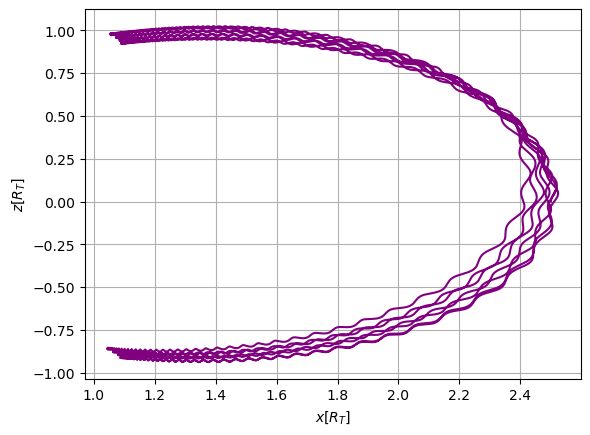

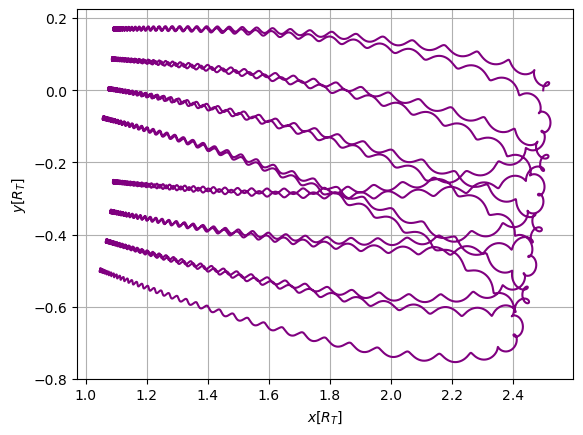

In [4]:
#2-D plot of x-z
fig_xz = plt.figure()
ax_xz = fig_xz.add_subplot(111)
plt.xlabel("$x[R_T]$")
plt.ylabel("$z[R_T]$")
ax_xz.grid(True)

ax_xz.plot(xx/d, zz/d, color='purple')
plt.show()

#2-D plot of x-y
fig_xy = plt.figure()
ax_xy = fig_xy.add_subplot(111)
plt.xlabel("$x[R_T]$")
plt.ylabel("$y[R_T]$")
ax_xy.grid(True)

ax_xy.plot(xx/d, yy/d, color='purple')
plt.show()

### For 250 MeV energy

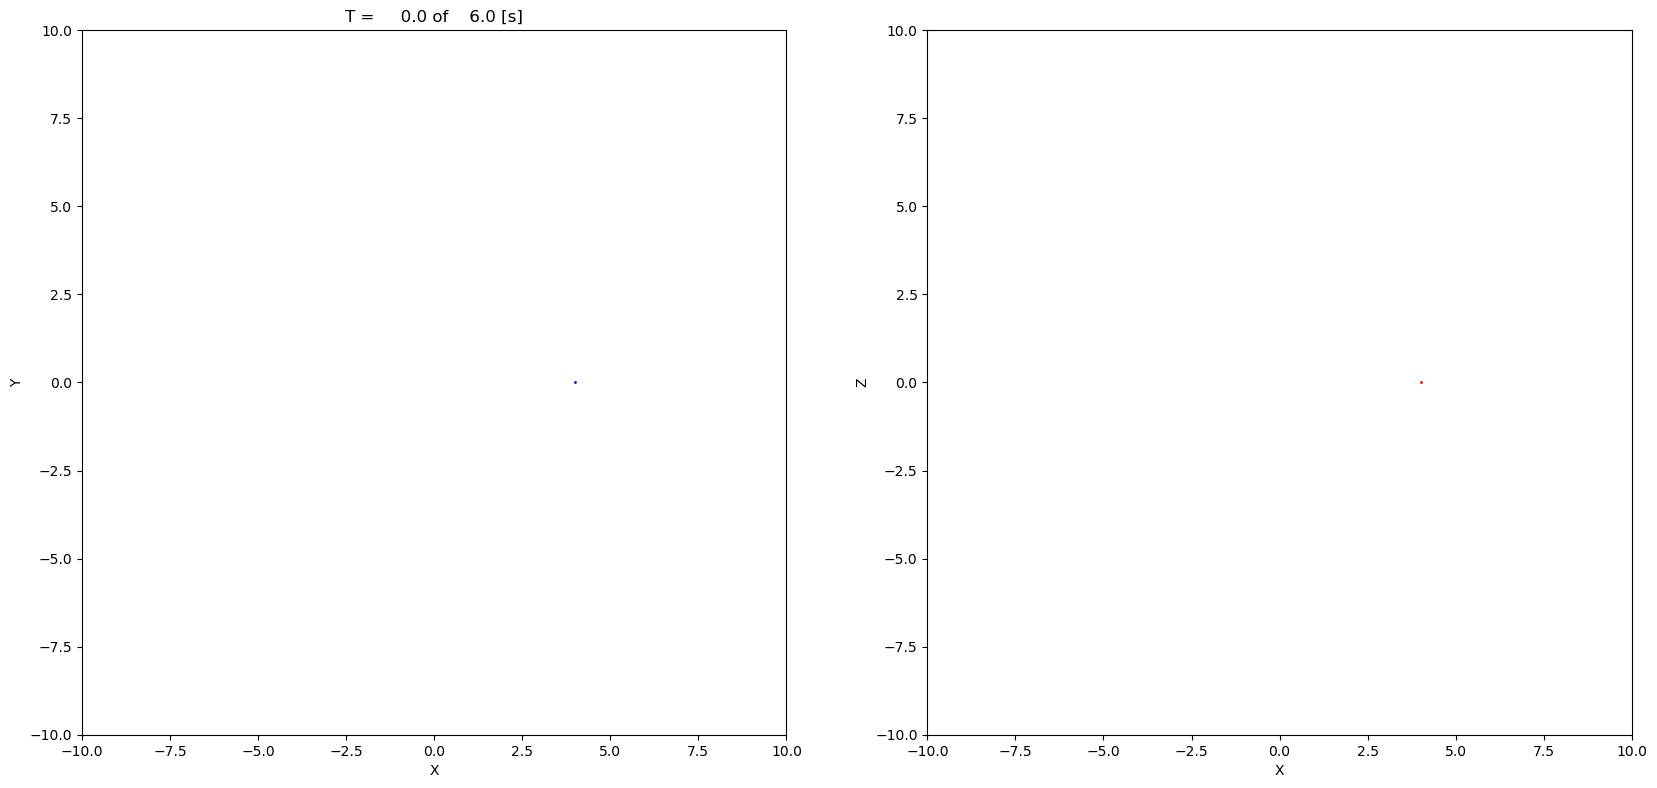

[1.44663475e-09]


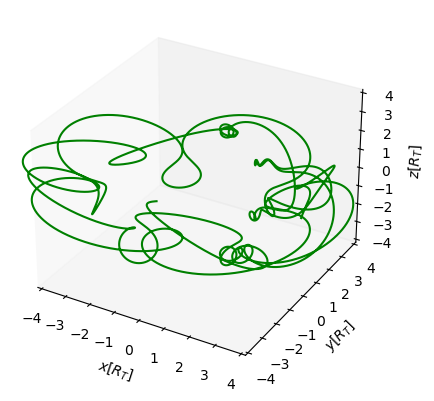

In [3]:
# Relativistic, RK4


import numpy as np
import matplotlib.pyplot as plt
import PVREDNOSTI, IZLAZ, DEFPOLJA # U istom direktorijumu kao i glavni program
from mpl_toolkits.mplot3d import Axes3D

#############################
# Input
#############################

N = 1 # only one particle is considered

T_sim = 6 # simulation duration[s] - to be modified (it was 6 initially)
dt = 0.0001 # timestep - to be modified (it was 0.0001 initially)
T_smp = 0.001 # timestep for graphycal representation

##########################
# Def
##########################

l = 0
q = np.zeros(N)
m = np.zeros(N)
x = np.zeros(N)
y = np.zeros(N)
z = np.zeros(N)
vx = np.zeros(N)
vy = np.zeros(N)
vz = np.zeros(N)
EPx = 0.0
EPy = 0.0
EPz = 0.0
BPx = 0.0
BPy = 0.0
BPz = 0.0   
pomx = np.zeros(N)
pomy = np.zeros(N)
pomz = np.zeros(N)

c = 299792458.0 # [m/s]

#################
# Init
#################

t = 0.0
 
q, m, x, y, z, vx, vy, vz = PVREDNOSTI.puslovi2(N, np)

fig, sp1, sp2 = IZLAZ.init_plots2(plt)

xx = np.zeros(60001)
yy = np.zeros(60001)
zz = np.zeros(60001)

ii = 0

xx[ii] = x
yy[ii] = y
zz[ii] = z

###############
# Main loop
###############
# RK4, see
# https://www.compadre.org/PICUP/resources/Numerical-Integration/

kinetickainit = m*0.5*(vx**2.0 + vy**2.0 + vz**2.0)

while t < (T_sim - dt):	

    #print(t)

    BPx, BPy, BPz, EPx, EPy, EPz = DEFPOLJA.magdipol(x, y, z, t, np)

    k1x = vx
    k1y = vy
    k1z = vz

    k1vx = (q/m)*np.sqrt(1.0 - ((k1x**2.0 + k1y**2 + k1z**2.0)/(c**2.0)))*(EPx + (k1y*BPz) - (BPy*k1z) - ((((EPx*k1x) + (EPy*k1y) + (EPz*k1z))/(c**2))*k1x))
    k1vy = (q/m)*np.sqrt(1.0 - ((k1x**2.0 + k1y**2 + k1z**2.0)/(c**2.0)))*(EPy + (k1z*BPx) - (BPz*k1x) - ((((EPx*k1x) + (EPy*k1y) + (EPz*k1z))/(c**2))*k1y))
    k1vz = (q/m)*np.sqrt(1.0 - ((k1x**2.0 + k1y**2 + k1z**2.0)/(c**2.0)))*(EPz + (k1x*BPy) - (BPx*k1y) - ((((EPx*k1x) + (EPy*k1y) + (EPz*k1z))/(c**2))*k1z))
    
    BPx, BPy, BPz, EPx, EPy, EPz = DEFPOLJA.magdipol((x + (0.5*k1x*dt)), (y + (0.5*k1y*dt)), (z + (0.5*k1z*dt)), (t + (0.5*dt)), np)

    k2x = vx + (0.5*k1vx*dt)
    k2y = vy + (0.5*k1vy*dt)
    k2z = vz + (0.5*k1vz*dt)

    k2vx = (q/m)*np.sqrt(1.0 - ((k2x**2.0 + k2y**2 + k2z**2.0)/(c**2.0)))*(EPx + (k2y*BPz) - (BPy*k2z) - ((((EPx*k2x) + (EPy*k2y) + (EPz*k2z))/(c**2))*k2x))
    k2vy = (q/m)*np.sqrt(1.0 - ((k2x**2.0 + k2y**2 + k2z**2.0)/(c**2.0)))*(EPy + (k2z*BPx) - (BPz*k2x) - ((((EPx*k2x) + (EPy*k2y) + (EPz*k2z))/(c**2))*k2y))
    k2vz = (q/m)*np.sqrt(1.0 - ((k2x**2.0 + k2y**2 + k2z**2.0)/(c**2.0)))*(EPz + (k2x*BPy) - (BPx*k2y) - ((((EPx*k2x) + (EPy*k2y) + (EPz*k2z))/(c**2))*k2z))

    BPx, BPy, BPz, EPx, EPy, EPz = DEFPOLJA.magdipol((x + (0.5*k2x*dt)), (y + (0.5*k2y*dt)), (z + (0.5*k2z*dt)), (t + (0.5*dt)), np)

    k3x = vx + (0.5*k2vx*dt)
    k3y = vy + (0.5*k2vy*dt)
    k3z = vz + (0.5*k2vz*dt)

    k3vx = (q/m)*np.sqrt(1.0 - ((k3x**2.0 + k3y**2.0 + k3z**2.0)/(c**2.0)))*(EPx + (k3y*BPz) - (BPy*k3z) - ((((EPx*k3x) + (EPy*k3y) + (EPz*k3z))/(c**2.0))*k3x))
    k3vy = (q/m)*np.sqrt(1.0 - ((k3x**2.0 + k3y**2.0 + k3z**2.0)/(c**2.0)))*(EPy + (k3z*BPx) - (BPz*k3x) - ((((EPx*k3x) + (EPy*k3y) + (EPz*k3z))/(c**2.0))*k3y))
    k3vz = (q/m)*np.sqrt(1.0 - ((k3x**2.0 + k3y**2.0 + k3z**2.0)/(c**2.0)))*(EPz + (k3x*BPy) - (BPx*k3y) - ((((EPx*k3x) + (EPy*k3y) + (EPz*k3z))/(c**2.0))*k3z))

    BPx, BPy, BPz, EPx, EPy, EPz = DEFPOLJA.magdipol((x + (k3x*dt)), (y + (k3y*dt)), (z + (k3z*dt)), (t + dt), np)

    k4x = vx + (k3vx*dt)
    k4y = vy + (k3vy*dt)
    k4z = vz + (k3vz*dt)

    k4vx = (q/m)*np.sqrt(1.0 - ((k4x**2.0 + k4y**2 + k4z**2.0)/(c**2.0)))*(EPx + (k4y*BPz) - (BPy*k4z) - ((((EPx*k4x) + (EPy*k4y) + (EPz*k4z))/(c**2))*k4x))
    k4vy = (q/m)*np.sqrt(1.0 - ((k4x**2.0 + k4y**2 + k4z**2.0)/(c**2.0)))*(EPy + (k4z*BPx) - (BPz*k4x) - ((((EPx*k4x) + (EPy*k4y) + (EPz*k4z))/(c**2))*k4y))
    k4vz = (q/m)*np.sqrt(1.0 - ((k4x**2.0 + k4y**2 + k4z**2.0)/(c**2.0)))*(EPz + (k4x*BPy) - (BPx*k4y) - ((((EPx*k4x) + (EPy*k4y) + (EPz*k4z))/(c**2))*k4z))

    x = x + (dt/6.0)*(k1x + (2.0*k2x) + (2.0*k3x) + k4x)
    y = y + (dt/6.0)*(k1y + (2.0*k2y) + (2.0*k3y) + k4y)
    z = z + (dt/6.0)*(k1z + (2.0*k2z) + (2.0*k3z) + k4z)

    vx = vx + (dt/6.0)*(k1vx + (2.0*k2vx) + (2.0*k3vx) + k4vx)
    vy = vy + (dt/6.0)*(k1vy + (2.0*k2vy) + (2.0*k3vy) + k4vy)
    vz = vz + (dt/6.0)*(k1vz + (2.0*k2vz) + (2.0*k3vz) + k4vz)

    t = t + dt

    ii = ii + 1
    xx[ii] = x
    yy[ii] = y
    zz[ii] = z 

    ###################################
    # output
    ###################################

    l += 1     
    
    if l*dt >= T_smp:

        l = 0.0
        IZLAZ.write_plots2(sp1, sp2, plt, x, y, z, t, T_sim)

kinetickafin = m*0.5*(vx**2.0 + vy**2.0 + vz**2.0)
ans = (kinetickainit - kinetickafin)/kinetickainit
print(ans)

d = 6378137.0
fig = plt.figure() #graph
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('auto')
ax.grid(False)
plt.xlabel("$x[R_T]$")
plt.ylabel("$y[R_T]$")
ax.set_zlabel("$z[R_T]$")
plt.axis('on')
ax.set_xlim3d(-4, 4) #change inf needed
ax.set_ylim3d(-4, 4)
ax.set_zlim3d(-4, 4)
plt.plot(xx/d, yy/d, zz/d, color = 'green')
plt.show()


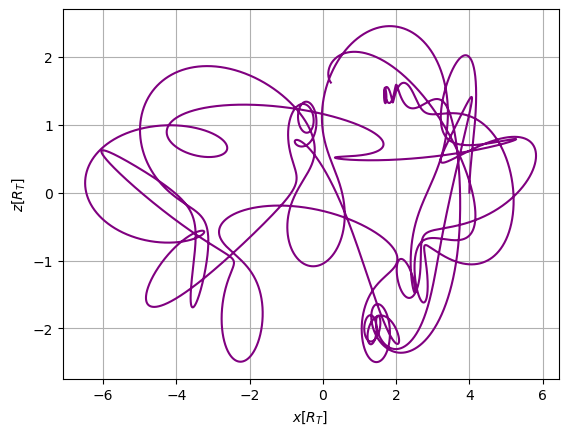

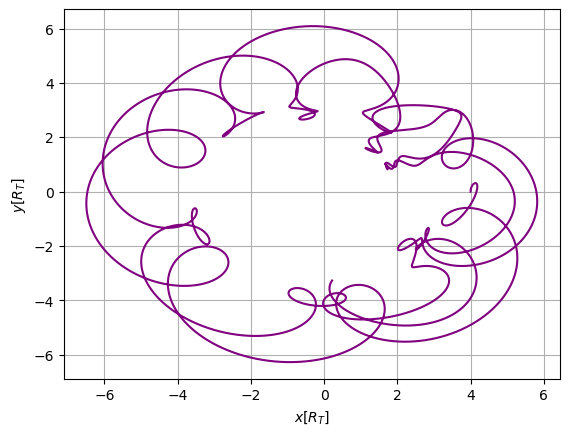

In [2]:
#x vs z plot
fig_xz = plt.figure()
ax_xz = fig_xz.add_subplot(111)
plt.xlabel("$x[R_T]$")
plt.ylabel("$z[R_T]$")
ax_xz.grid(True)

ax_xz.plot(xx/d, zz/d, color='purple')
plt.show()

#x-y plot
fig_xy = plt.figure()
ax_xy = fig_xy.add_subplot(111)
plt.xlabel("$x[R_T]$")
plt.ylabel("$y[R_T]$")
ax_xy.grid(True)

ax_xy.plot(xx/d, yy/d, color='purple')
plt.show()